In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_excel("/content/ARDL.xls")

# Specify the dependent and independent variables
y = data["Close"]
x = data["BRENT"]

# Create lagged variables
lagged_x = x.shift(1)
lagged_y = y.shift(1)
lagged_x_diff = np.log(x).diff(1).shift(1)
lagged_y_diff = np.log(y).diff(1).shift(1)

# Create a DataFrame with the variables
df = pd.DataFrame({'y': y, 'x': x, 'lagged_x': lagged_x, 'lagged_y': lagged_y, 'lagged_x_diff': lagged_x_diff, 'lagged_y_diff': lagged_y_diff})

# Create the ARDL model equation
model_formula = "y ~ x + lagged_x + lagged_y + lagged_x_diff + lagged_y_diff"

# Estimate the ARDL model
model = sm.formula.ols(formula=model_formula, data=df).fit()

# Generate forecasts
forecast_period = 3  # Number of periods for forecasting
forecast_data = df.iloc[-forecast_period:]  # Use the last observations for the forecast period
forecast = model.predict(exog=forecast_data)

# Calculate RMSE
actual_values = data["Close"].tail(forecast_period)  # Actual values for the forecast period
rmse = np.sqrt(mean_squared_error(actual_values, forecast))
print("RMSE:", rmse)


RMSE: 6.2939364249661445


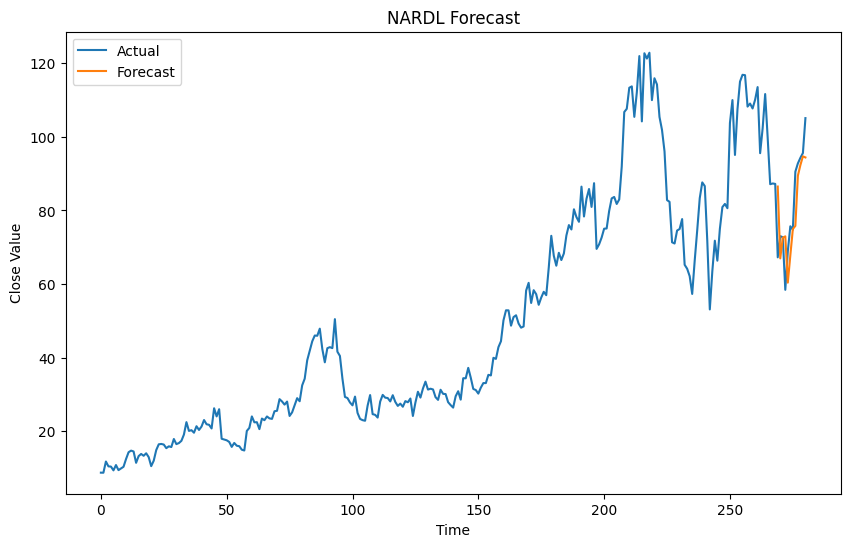

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel("/content/ARDL.xls")

# Specify the dependent and independent variables
y = data["Close"]
x = data["BRENT"]

# Create lagged variables
lagged_x = x.shift(1)
lagged_y = y.shift(1)
lagged_x_diff = np.log(x).diff(1).shift(1)
lagged_y_diff = np.log(y).diff(1).shift(1)

# Create a DataFrame with the variables
df = pd.DataFrame({'y': y, 'x': x, 'lagged_x': lagged_x, 'lagged_y': lagged_y, 'lagged_x_diff': lagged_x_diff, 'lagged_y_diff': lagged_y_diff})

# Create the NARDL model equation
model_formula = "y ~ x + lagged_x + lagged_y + lagged_x_diff + lagged_y_diff"

# Estimate the ARDL model
model = sm.formula.ols(formula=model_formula, data=df).fit()

# Generate forecasts
forecast_period = 12  # Number of periods for forecasting
forecast_data = df.iloc[-forecast_period:]  # Use the last observations for the forecast period
forecast = model.predict(exog=forecast_data)

# Plot actual and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(data["Close"], label="Actual")
plt.plot(forecast.index, forecast, label="Forecast")
plt.title("ARDL Forecast")
plt.xlabel("Time")
plt.ylabel("Close Value")
plt.legend()
plt.show()
